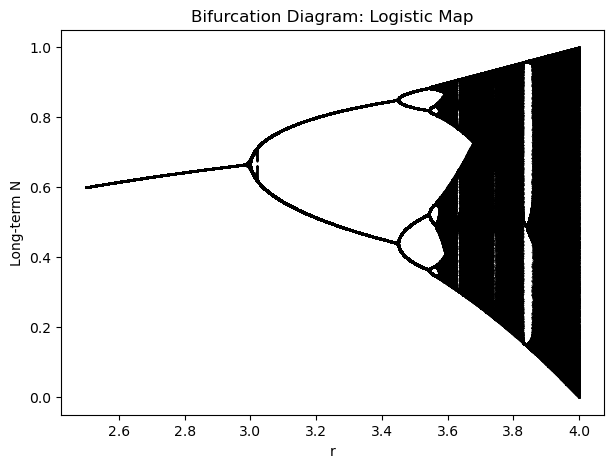

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(N, r):
    return r * N * (1 - N)

def bifurcation_diagram(r_min=2.5, r_max=4.0, steps=1000, discard=200, resolution=4000):
    """
    Generate (r, N) pairs for a bifurcation diagram of the logistic map:
       N_{t+1} = r * N_t * (1 - N_t).

    Parameters:
      r_min, r_max : range of r values.
      steps        : total number of iterations per r.
      discard      : how many initial iterations to discard as 'transient'.
      resolution   : how many r-values to sample.

    Returns:
      (r_vals, N_vals) as arrays that can be plotted (scatter) to see the bifurcation.
    """
    r_values = np.linspace(r_min, r_max, resolution)
    r_list = []
    N_list = []

    for r in r_values:
        # start from random initial condition in (0,1)
        N = np.random.rand()
        # iterate for 'discard' steps to let transients die out
        for _ in range(discard):
            N = logistic_map(N, r)
        # now record the next 'steps-discard' values
        for _ in range(discard, steps):
            N = logistic_map(N, r)
            r_list.append(r)
            N_list.append(N)

    return np.array(r_list), np.array(N_list)

# Run the bifurcation
r_bif, N_bif = bifurcation_diagram(
    r_min=2.5, r_max=4.0, steps=1000, discard=200, resolution=2000
)

# Plot the bifurcation diagram
plt.figure(figsize=(7,5))
plt.scatter(r_bif, N_bif, s=0.1, color='black')
plt.xlabel('r')
plt.ylabel('Long-term N')
plt.title('Bifurcation Diagram: Logistic Map')
plt.show()